In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('entrada.csv')

In [8]:
print(df.isnull().sum())

Chutes a gol 1          1512
Chutes a gol 2          1512
Impedimentos 1          2774
Impedimentos 2          2774
Escanteios 1            2328
Escanteios 2            2328
Chutes fora 1           2324
Chutes fora 2           2324
Faltas 1                2322
Faltas 2                2322
Cartões amarelos 1         0
Cartões amarelos 2         0
Cartões vermelhos 1        0
Cartões vermelhos 2        0
Cruzamentos 1          18701
Cruzamentos 2          18701
Laterais 1             12549
Laterais 2             12549
Chutes bloqueados 1    18873
Chutes bloqueados 2    18873
Contra-ataques 1       21453
Contra-ataques 2       21453
Gols 1                     0
Gols 2                     0
Tiro de meta 1         15701
Tiro de meta 2         15701
Tratamentos 1          22697
Tratamentos 2          22697
Substituições 1        18296
Substituições 2        18296
Tiros-livres 1         21470
Tiros-livres 2         21470
Defesas difíceis 1     21520
Defesas difíceis 2     21520
Posse 1(%)    

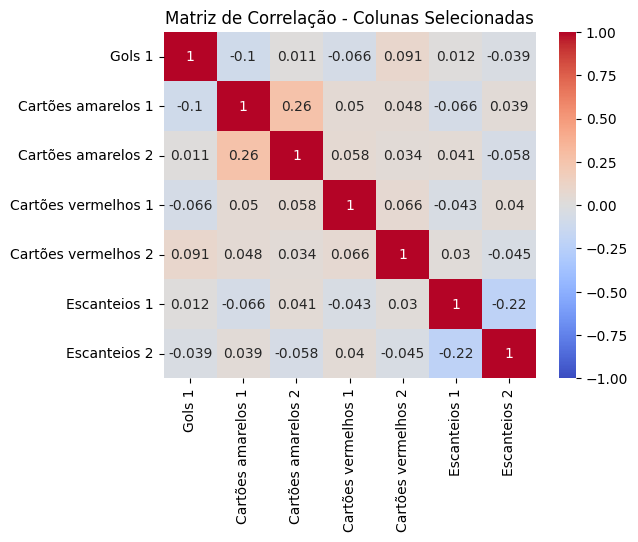

In [9]:
# Lista de colunas específicas que você quer incluir na correlação
colunas_desejadas = ['Gols 1', 'Cartões amarelos 1', 'Cartões amarelos 2', 'Cartões vermelhos 1', 'Cartões vermelhos 2', 'Escanteios 1','Escanteios 2']  # substitua pelos nomes reais

# Filtra o DataFrame apenas com essas colunas
df_filtrado = df[colunas_desejadas]

# Calcula a matriz de correlação
correlacao = df_filtrado.corr(numeric_only=True)

# Plota o heatmap
plt.figure(figsize=(6, 4.5))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlação - Colunas Selecionadas")
plt.show()

Correlação Bruta

C:\Users\danie\AppData\Local\Temp\ipykernel_17316\1028611287.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes_gols1.values, y=correlacoes_gols1.index, palette='coolwarm')


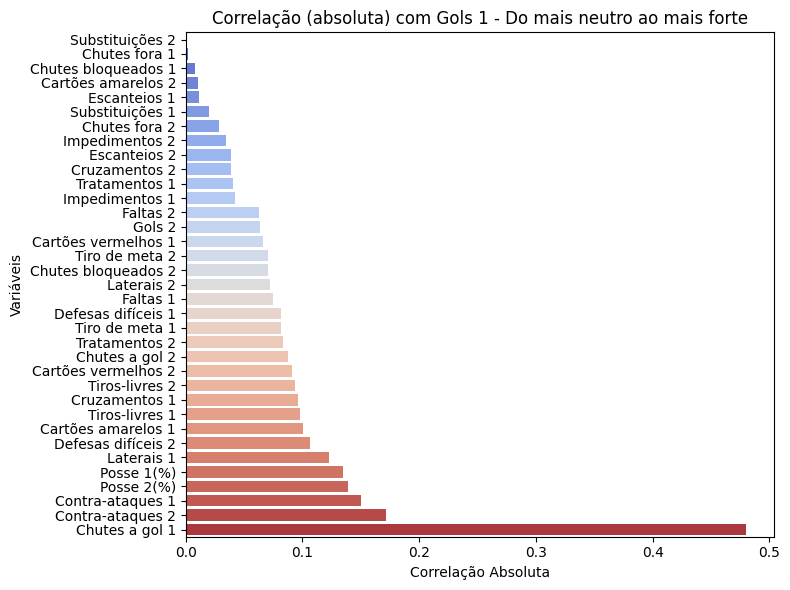

C:\Users\danie\AppData\Local\Temp\ipykernel_17316\1028611287.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes_gols2.values, y=correlacoes_gols2.index, palette='coolwarm')


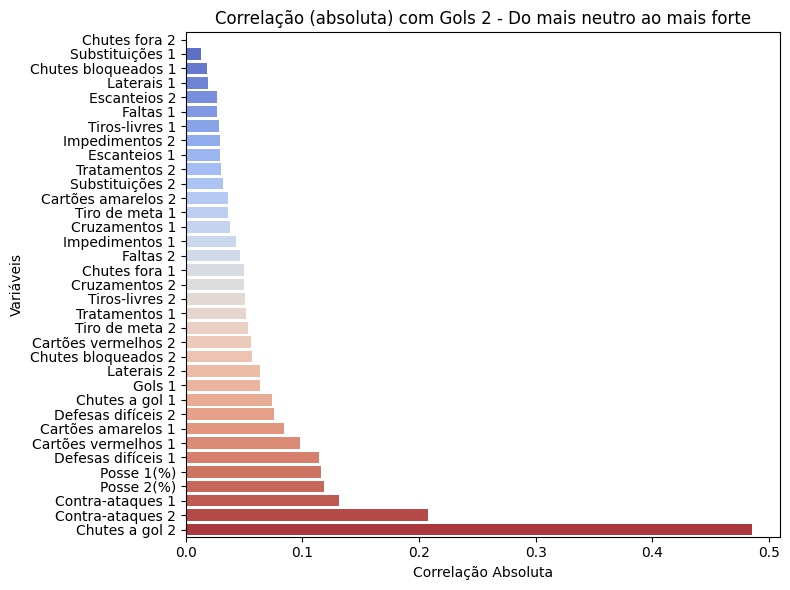

In [10]:
# Remove colunas sem variância (como cartões vermelhos com todos 0)
df_valido = df.loc[:, df.nunique() > 1]

# Filtra apenas colunas numéricas
df_numerico = df_valido.select_dtypes(include='number')

# Calcula correlação
correlacao = df_numerico.corr(numeric_only=True)

# Filtra correlações com Gols 1 (exceto ele mesmo)
correlacoes_gols1 = correlacao['Gols 1'].drop(labels=['Gols 1', ], errors='ignore').abs().sort_values()

# Filtra correlações com Gols 2 (exceto ele mesmo)
correlacoes_gols2 = correlacao['Gols 2'].drop(labels=['Gols 2'], errors='ignore').abs().sort_values()

# Plot para Gols 1
plt.figure(figsize=(8, 6))
sns.barplot(x=correlacoes_gols1.values, y=correlacoes_gols1.index, palette='coolwarm')
plt.title('Correlação (absoluta) com Gols 1 - Do mais neutro ao mais forte')
plt.xlabel('Correlação Absoluta')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

# Plot para Gols 2
plt.figure(figsize=(8, 6))
sns.barplot(x=correlacoes_gols2.values, y=correlacoes_gols2.index, palette='coolwarm')
plt.title('Correlação (absoluta) com Gols 2 - Do mais neutro ao mais forte')
plt.xlabel('Correlação Absoluta')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

Removendo as colunas que mais tem nulo

Total de colunas numéricas originais: 36
Total de colunas utilizadas na análise: 31
Total de colunas descartadas (sem variância ou ignoradas): 5


C:\Users\danie\AppData\Local\Temp\ipykernel_17316\365694775.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes_gols1.values, y=correlacoes_gols1.index, palette='coolwarm')


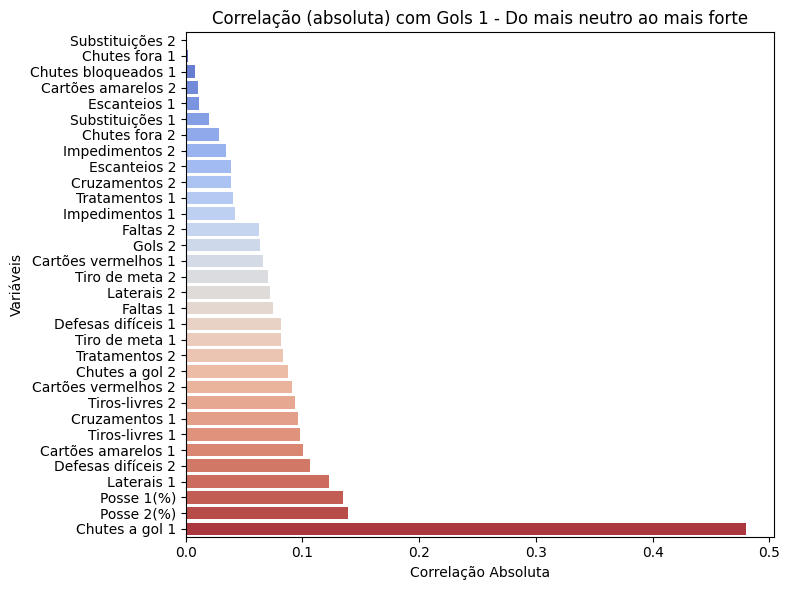

C:\Users\danie\AppData\Local\Temp\ipykernel_17316\365694775.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes_gols2.values, y=correlacoes_gols2.index, palette='coolwarm')


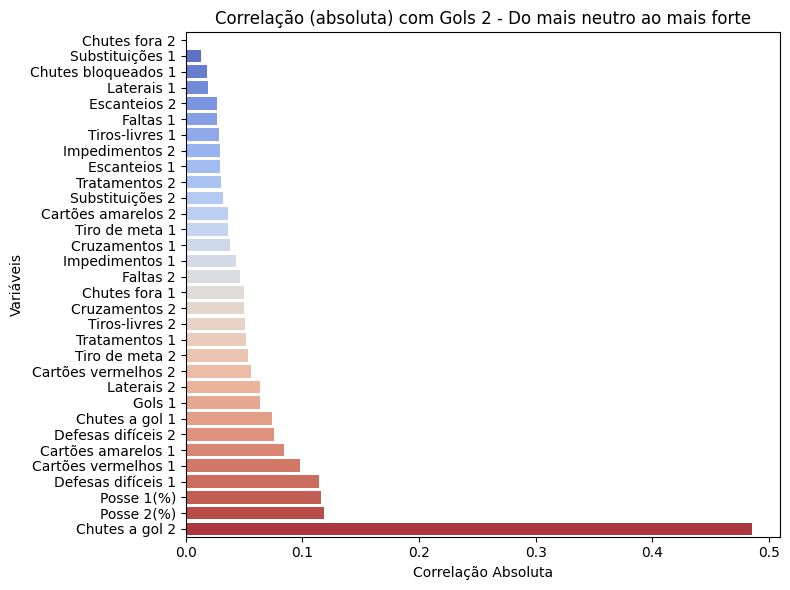

In [11]:
# Lista de colunas que você deseja ignorar na análise
colunas_ignoradas = ['Contra-ataques 1', 'Contra-ataques 2', 'Chutes bloqueados 2']

# Total de colunas numéricas originais
colunas_numericas_originais = df.select_dtypes(include='number').columns

# Remove colunas sem variância
df_valido = df.loc[:, df.nunique() > 1]

# Filtra apenas colunas numéricas
df_numerico = df_valido.select_dtypes(include='number')

# Calcula correlação
correlacao = df_numerico.corr(numeric_only=True)

# Exibe contagem de colunas
total_originais = len(colunas_numericas_originais)
colunas_pos_filtragem = df_numerico.columns.difference(colunas_ignoradas).difference(['Gols 1', 'Gols 2'])
total_utilizadas = len(colunas_pos_filtragem)
total_descartadas = total_originais - total_utilizadas

print(f"Total de colunas numéricas originais: {total_originais}")
print(f"Total de colunas utilizadas na análise: {total_utilizadas}")
print(f"Total de colunas descartadas (sem variância ou ignoradas): {total_descartadas}")

# Filtra correlações com Gols 1
correlacoes_gols1 = correlacao['Gols 1'].drop(labels=['Gols 1'] + colunas_ignoradas, errors='ignore').abs().sort_values()

# Filtra correlações com Gols 2
correlacoes_gols2 = correlacao['Gols 2'].drop(labels=['Gols 2'] + colunas_ignoradas, errors='ignore').abs().sort_values()

# Plot para Gols 1
plt.figure(figsize=(8, 6))
sns.barplot(x=correlacoes_gols1.values, y=correlacoes_gols1.index, palette='coolwarm')
plt.title('Correlação (absoluta) com Gols 1 - Do mais neutro ao mais forte')
plt.xlabel('Correlação Absoluta')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

# Plot para Gols 2
plt.figure(figsize=(8, 6))
sns.barplot(x=correlacoes_gols2.values, y=correlacoes_gols2.index, palette='coolwarm')
plt.title('Correlação (absoluta) com Gols 2 - Do mais neutro ao mais forte')
plt.xlabel('Correlação Absoluta')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()


In [12]:
def get_result_numeric(row):
    return 1 if row['Gols 1'] > row['Gols 2'] else (-1 if row['Gols 1'] < row['Gols 2'] else 0)

df['Resultado'] = df.apply(get_result_numeric, axis=1)

df['Resultado'].value_counts()

Resultado
 1    12498
-1     8170
 0     7048
Name: count, dtype: int64